# MSBA CAPSTONE - Swire Coca-Cola Customer Success Prediction

# 1. Business Problem Statement

### Local businesses significantly contribute to the growth of Swire Coca-Cola and over time the management has also recognized their importance and have decided to partner with them and build a sustainable business model which will be equal beneficial for them and make the partnership profitable.
### The metrics like Business popularity, Longevity, 3-year volume sales etc. are useful in evaluation of profitability of each partner restaurant.


### The main objective of this Exploratory Data Analysis is to understand the relationship between variables which assist in finding out the profitable customer collaborations and accordingly the price and funding are decided. 

# Exploratory Data Analysis (EDA)


## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy.stats import pearsonr

## Import Datasets

In [2]:
customer_df = pd.read_excel('FSOP_Customer_Data_v2.0.xlsb', engine = 'pyxlsb')
sales_df = pd.read_excel('FSOP_Sales_Data_v2.0.xlsb', engine = 'pyxlsb')

## View the Dataset

In [3]:
# top ten rows in customer dataset
customer_df.head(10)

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
1,C0409008701210025,"Tacoma, WA","Tacoma Sales Center, WA",39944,FORT LEWIS,98433,PIERCE,-122.587244,47.102365,Eating & Drinking,Quick Service Restau,QSR-Pizza,DSD,Quick Service Restau,FSOP,EATING/DRINKING
2,C0278065006510168,"Walla Walla, WA","Walla Walla, WA",38035,COLLEGE PLACE,99324-9730,WALLA WALLA,-118.373040,46.052920,Other Shopping & Ser,General Merchandiser,Hardware/Home-Improv,DSD,General Merchandiser,FSOP,RETAIL
3,C0559043803480412,"Prescott, AZ","Glendale, AZ",34215,PRESCOTT,86301-3313,YAVAPAI,-112.450490,34.545020,Travel/Transportatio,Lodging,Other Lodging,DSD,Lodging,FSOP,LODGING
4,C0729091103720749,"Reno, NV","Reno, NV",41990,SOUTH LAKE TAHOE,96150-7702,EL DORADO,-119.984227,38.926637,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL
5,C0291037806480104,"Albuquerque, NM","Albuquerque, NM",38155,ALBUQUERQUE,87123-3626,BERNALILLO,-106.529874,35.070479,Other Shopping & Ser,General Merchandiser,Hardware/Home-Improv,DSD,General Merchandiser,FSOP,RETAIL
6,C0295075205560876,"Denver, CO","Denver, CO",41652,LAKEWOOD,80215,JEFFERSON,-105.117785,39.740125,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL
7,C0302036401720464,"Tempe, AZ","Tempe, AZ",35844,CASA GRANDE,85122-3905,PINAL,-111.756510,32.882576,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL
8,C0208028100360467,"Wilsonville, OR","Wilsonville, OR",44293,PORTLAND,97218-1009,MULTNOMAH,-122.591624,45.586179,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
9,C0543085301160999,"Albuquerque, NM","Albuquerque, NM",37585,ALBUQUERQUE,87106-3247,BERNALILLO,-106.617273,35.047758,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL


In [4]:
#top ten rows in sales dataset
sales_df.head(10)

,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
0,C0051046109640797,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,20 OZ 1-Ls 24,88.000,2246.40,2505.60,1924.70,1112.73,682.41,44208,44925,157
1,C0348074302380406,M042308250090,CORE SPARKLING,LOW CALORIE,Aluminum Can - Sleek,12 OZ 4-Pk 24,58.000,1197.12,1666.92,1468.77,316.19,1185.98,44229,44925,40
2,C0277089703710223,M010605530774,TEA,LOW CALORIE,Plastic Bottle - Other,18.5 OZ 1-Ls 12,108.000,3429.00,1755.00,1499.03,403.25,1107.73,44627,44925,62
3,C0112072503650635,M050800200648,ENERGY DRINKS,REGULAR CALORIE,Aluminum Can,16 OZ 1-Ls 24,15.000,307.12,592.88,553.18,77.90,475.28,44721,44925,17
4,C0305009008200279,M009608400345,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Dimple,2 LTR 1-Ls 8,195.000,3382.05,2077.95,1812.90,661.21,1416.99,44201,44925,166
5,C0095084905960864,M000802070510,ENHANCED WATER BEVERAGES,LOW CALORIE,Plastic Bottle - Other,23.7 OZ 1-Ls 12,0.000,0.00,0.00,8.68,4.85,0.00,44412,44446,5
6,C0717039509940498,M098309760842,ENHANCED WATER BEVERAGES,LOW CALORIE,Plastic Bottle - Other,20 OZ 1-Ls 12,220.000,6068.81,3641.19,3577.73,1131.96,2112.88,44203,44925,156
7,C0143015807360957,M099807940026,CORE SPARKLING,LOW CALORIE,Aluminum Can,12 OZ 12-Pk 24 Frid,900.000,16549.36,10450.64,10196.98,4410.75,5974.83,44239,44925,107
8,C0726003400050379,M015409520904,CORE SPARKLING,LOW CALORIE,Plastic Bottle - Contour,2 LTR 1-Ls 8,35.625,620.94,376.56,330.09,167.13,252.36,44225,44926,46
9,C0345065304710619,M095505780097,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Dimple,20 OZ 1-Ls 24,10.000,322.80,177.60,175.77,93.13,76.36,44249,44925,46


In [5]:
#check how many unique prodcuts are sold
sales_df['PRODUCT_SOLD_BLINDED'].nunique()

1558

## Merge Datasets

### Merge sales and customer datasets

In [6]:
swire_df = sales_df.merge(customer_df, on='CUSTOMER_NUMBER_BLINDED', how= 'inner')
swire_df

,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,...,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
0,C0051046109640797,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,20 OZ 1-Ls 24,88.0,2246.40,2505.60,1924.70,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
1,C0051046109640797,M083804460042,ENHANCED WATER BEVERAGES,REGULAR CALORIE,Plastic Bottle - Other,20 OZ 1-Ls 12,49.0,1154.52,987.48,825.74,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
2,C0051046109640797,M080903130702,ENHANCED WATER BEVERAGES,LOW CALORIE,Plastic Bottle - Other,1 LTR 1-Ls 12,1.0,23.52,24.48,18.33,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
3,C0051046109640797,M009208500468,ENHANCED WATER BEVERAGES,REGULAR CALORIE,Plastic Bottle - Other,20 OZ 1-Ls 12,0.0,0.00,0.00,0.21,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
4,C0051046109640797,M029507850412,ENHANCED WATER BEVERAGES,LOW CALORIE,Plastic Bottle - Other,1 LTR 1-Ls 12,2.0,47.04,48.96,36.61,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831839,C0779075600590854,M093805490555,COFFEE,REGULAR CALORIE,Plastic Bottle - Other,13.7 OZ 1-Ls 12,0.0,0.00,0.00,0.00,...,LANE,-123.158000,44.062955,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
831840,C0737058205910387,M093201520599,CORE SPARKLING,LOW CALORIE,Aluminum Can,12 OZ 12-Pk 24 Frid,0.0,0.00,0.00,0.00,...,MULTNOMAH,-122.679910,45.514470,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
831841,C0733097206680354,M099404020717,CORE SPARKLING,REGULAR CALORIE,Aluminum Can,12 OZ 12-Pk 24 Frid,0.0,0.00,0.00,0.00,...,COCHISE,-109.870710,32.223515,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
831842,C0623013105750204,M005008880997,PACKAGED WATER (PLAIN & ENRICHED),LOW CALORIE,Plastic Bottle - Other,16.9 OZ 32-Pk 32,0.0,0.00,0.00,0.00,...,WASHOE,-119.786958,39.478349,Eating & Drinking,Full Service Restaur,FSR-All Other,Equipment Only,Full Service Restaur,FSOP,EATING/DRINKING


In [7]:
# Check for null values
swire_df.isnull().any()

CUSTOMER_NUMBER_BLINDED                   False
PRODUCT_SOLD_BLINDED                      False
BEV_CAT_DESC                               True
CALORIE_CAT_DESC                           True
PACK_TYPE_DESC                            False
PACK_SIZE_SALES_UNIT_DESCRIPTION          False
PHYSICAL_VOLUME                           False
DISCOUNT                                  False
INVOICE_PRICE                             False
DEAD_NET                                  False
GROSS_PROFIT_DEAD_NET                     False
COGS                                      False
MIN_POSTING_DATE                          False
MAX_POSTING_DATE                          False
NUM_OF_TRANSACTIONS                       False
SALES_OFFICE_DESCRIPTION                  False
DELIVERY_PLANT_DESCRIPTION                False
ON_BOARDING_DATE                          False
ADDRESS_CITY                              False
ADDRESS_ZIP_CODE                          False
COUNTY                                  

In [8]:
#check for duplicates
swire_df.duplicated().sum()

0

In [9]:
#Variables in the merged dataset
swire_df.columns

Index(['CUSTOMER_NUMBER_BLINDED', 'PRODUCT_SOLD_BLINDED', 'BEV_CAT_DESC',
       'CALORIE_CAT_DESC', 'PACK_TYPE_DESC',
       'PACK_SIZE_SALES_UNIT_DESCRIPTION', 'PHYSICAL_VOLUME', 'DISCOUNT',
       'INVOICE_PRICE', 'DEAD_NET', 'GROSS_PROFIT_DEAD_NET', 'COGS',
       'MIN_POSTING_DATE', 'MAX_POSTING_DATE', 'NUM_OF_TRANSACTIONS',
       'SALES_OFFICE_DESCRIPTION', 'DELIVERY_PLANT_DESCRIPTION',
       'ON_BOARDING_DATE', 'ADDRESS_CITY', 'ADDRESS_ZIP_CODE', 'COUNTY',
       'GEO_LONGITUDE', 'GEO_LATITUDE',
       'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION',
       'CUSTOMER_TRADE_CHANNEL_DESCRIPTION',
       'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION',
       'BUSINESS_TYPE_EXTENSION_DESCRIPTION',
       'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2', 'MARKET_DESCRIPTION',
       'COLD_DRINK_CHANNEL_DESCRIPTION'],
      dtype='object')

In [10]:
# statistical summary of the merged dataset
swire_df[['PHYSICAL_VOLUME','DISCOUNT','INVOICE_PRICE','DEAD_NET','GROSS_PROFIT_DEAD_NET','COGS','NUM_OF_TRANSACTIONS']].describe()

,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,NUM_OF_TRANSACTIONS
count,831844.000000,8.318440e+05,8.318440e+05,8.318440e+05,831844.000000,8.318440e+05,831844.000000
mean,36.216629,1.003791e+03,9.264490e+02,8.452765e+02,294.968306,5.802669e+02,21.227132
std,564.497164,1.333821e+04,8.980693e+03,7.750886e+03,2631.942989,5.575562e+03,33.455899
min,-65832.000000,-1.390200e+04,-2.298240e+04,-3.453411e+04,-145562.380000,-7.392340e+03,1.000000
25%,1.000000,1.764000e+01,3.110000e+01,2.928000e+01,8.620000,1.246000e+01,2.000000
50%,5.000000,9.000000e+01,1.367900e+02,1.300000e+02,44.800000,7.270000e+01,7.000000
75%,17.000000,4.134000e+02,5.234200e+02,5.000000e+02,181.940000,2.976700e+02,24.000000
max,136349.000000,2.847662e+06,1.813004e+06,1.813004e+06,883618.130000,1.370468e+06,468.000000


## Exploratory questions to infer insights from the dataset

## 1. What category of beverage has more market?

In [11]:
# Group the data by Beverage category 
Bev_counts = swire_df.groupby('BEV_CAT_DESC')['BEV_CAT_DESC'].count()

In [12]:
#sort the data by category 
Bev_counts = Bev_counts.sort_values(ascending=False)

In [13]:
top_Bev = Bev_counts[:]

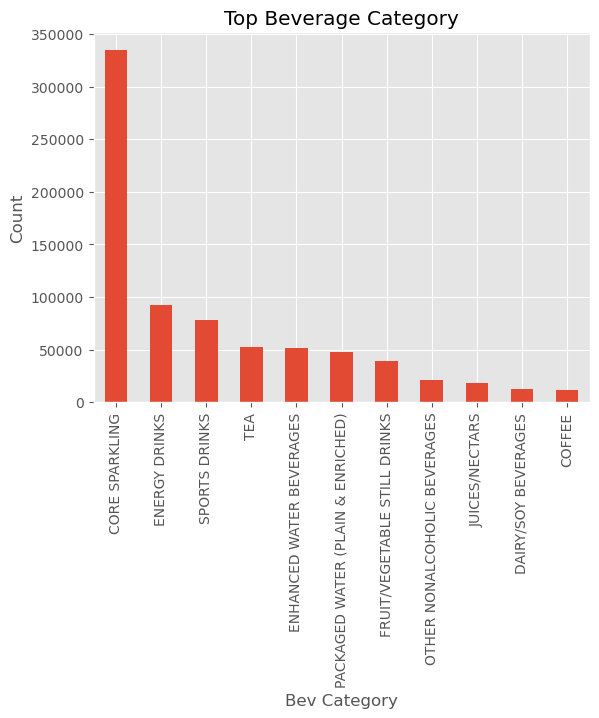

In [14]:
# Plot the Bar chart
top_Bev.plot(kind='bar')
plt.title('Top Beverage Category')
plt.xlabel('Bev Category')
plt.ylabel('Count')
plt.show()

### Core sparkling has the highest sales when compared to other categories. It is evident that the company is concentrating on the core sparkling category but it should also promote energy drinks and sports drinks to expand its customer base and build market share in those categories. 

## 2. How are discounts effecting the sales of the products?

In [15]:
# Filter only positive sales value
swire_df = swire_df[swire_df['PHYSICAL_VOLUME'] >= 0]

In [16]:
avg_discount = swire_df['DISCOUNT'].mean()
avg_sales = swire_df['PHYSICAL_VOLUME'].mean()

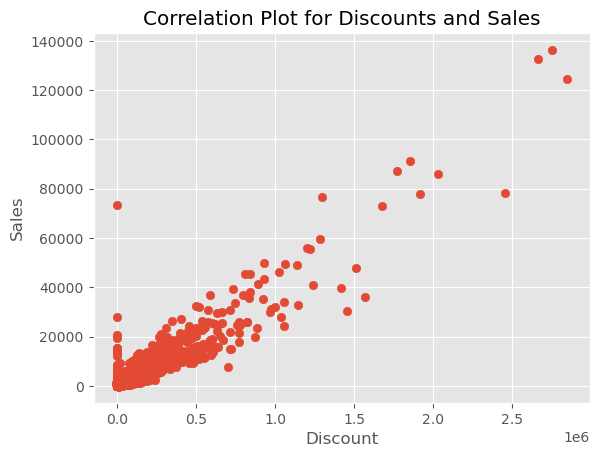

In [17]:
# Plot the scatterplot graph for discount and physical volume
plt.scatter(swire_df['DISCOUNT'], swire_df['PHYSICAL_VOLUME'])
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.title('Correlation Plot for Discounts and Sales')
plt.show()

In [18]:
corr, _ = pearsonr(swire_df['DISCOUNT'], swire_df['PHYSICAL_VOLUME'])
print('Correlation coefficient: %.3f' % corr)

Correlation coefficient: 0.943


### It is observed that as discounts increase the sales of products, we can conclude that discounts and competitive pricing are very important factors to maintain and build customer base. A correlation factor of 0.926 is a clear indicator that sales are directly impacted by the discounts provided by the firm.

## 3. How do discounts effects profits and what is the relation between sales, discounts and profits? 

In [19]:
# mean of discounts and profits
avg_discount = swire_df['DISCOUNT'].mean()
avg_profit = swire_df['GROSS_PROFIT_DEAD_NET'].mean()

In [20]:
# group by discounts
dis = swire_df.groupby('DISCOUNT').mean()

/var/folders/xr/7hx_r70s5b7gb5ywpt62kj3r0000gr/T/ipykernel_2217/2438073455.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dis = swire_df.groupby('DISCOUNT').mean()


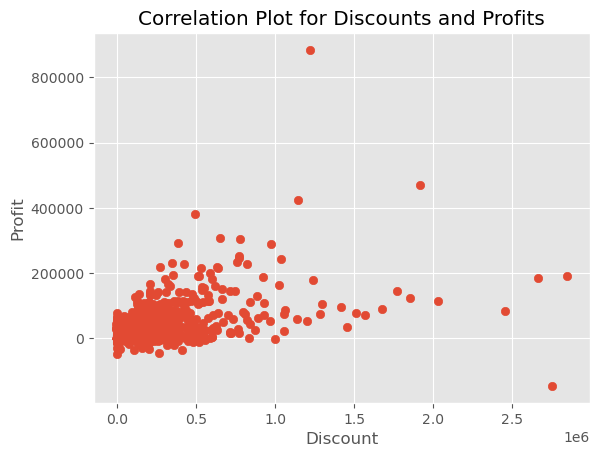

In [21]:
# Plot a graph with discounts and gross profit 
plt.scatter(swire_df['DISCOUNT'], swire_df['GROSS_PROFIT_DEAD_NET'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Correlation Plot for Discounts and Profits')
plt.show()

### The discounts and sales are having a positive correlation from which we can infer that profits increase when discounts are provided but when we look at the sale metrics in relation to the discounts they have a stronger correlation. It is clear that giving discounts is increasing sales but that doesn't transalate to higher profits.  

## 4. What are the trade Channels which provide highest business for Swire?

In [23]:
best_trade_channel = trade_channel.sort_values(ascending=False)

In [24]:
best_trade_channel_count = best_trade_channel[:]

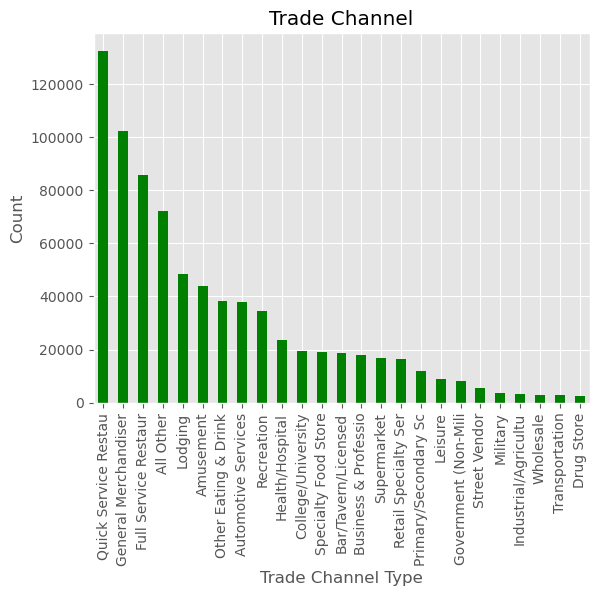

In [25]:
#Plot the Bar chart
best_trade_channel_count.plot(kind='bar', color = 'green')
plt.title('Trade Channel')
plt.xlabel('Trade Channel Type')
plt.ylabel('Count')
plt.show()

### The top 5 trade channels provide high sales than the rest combined, considering this we can say that swire can be more confident to collaborate with the customers who operate in  the top 5 trade channels.

## Final Observations

### The correlation between sales and discount shows that a partnership is successful with high sales if the company provides discounts proportionally but the comany should also make sure that the profitability is not compromised . The comany has already built a strong presence with its core sparkling beverages but there is room for improvement to build its sports and energy drink business as the are the second and third most consumed products from its portfolio. Further the comany can confidently colaborate with restaurants, supermarkets and grocery stores where they have a proven record of successfully selling high volumes of stock.

# Modeling 

### Here linear regression and random forest model have been deployed to predict the profitable customer swire can collaborate. 

In [41]:
#import libraries 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score


## Linear Regression Model

### Linear regression is performed on the merged dataset and taking the financial metrics into consideration and keeping sales volume(Physical Volume as target variable). The model is trained with variables like discounts, invoice price(revenue) and dead_net( profit after advertising expenses) which are directly related to sales volume.   

In [84]:
# read and select relevant columns
swire_df = swire_df[['PHYSICAL_VOLUME', 'DISCOUNT', 'INVOICE_PRICE', 'DEAD_NET']]

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(swire_df[['DISCOUNT', 'INVOICE_PRICE', 'DEAD_NET']], swire_df['PHYSICAL_VOLUME'], test_size=0.2, random_state=42)

In [39]:
# Fiting a linear regression model to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
# Making predictions on the testing data
y_pred = regressor.predict(X_test)

In [41]:
# Evaluating the model using rmse and R- Squared Value
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Root mean squared error:", rmse)
print("R-squared value:", r2)

Root mean squared error: 170.9645287535092
R-squared value: 0.8995708534156123


### The rmse value of 170.96  and r-squared value 0.8995 shows that this is a effective model but the disadvantage of this model is that there it can't accommodate more variables and especially categorical variables.

In [63]:
# Perform 5- fold Cross-Validation
cv_scores = cross_val_score(regressor, swire_df[['DISCOUNT', 'INVOICE_PRICE', 'DEAD_NET']], swire_df['PHYSICAL_VOLUME'], cv=5)

In [64]:
# CV- scores
print("Cross-validation scores: {}".format(cv_scores))
print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))

Cross-validation scores: [0.9056345  0.84023999 0.76459358 0.71813449 0.91893447]
Mean cross-validation score: 0.83


## Random Forest model

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [27]:
# selecting the relevant columns
swire_df = swire_df[['CUSTOMER_NUMBER_BLINDED', 'PRODUCT_SOLD_BLINDED', 'BEV_CAT_DESC', 'CALORIE_CAT_DESC', 'PACK_TYPE_DESC',
                     'PACK_SIZE_SALES_UNIT_DESCRIPTION', 'PHYSICAL_VOLUME', 'DISCOUNT', 'INVOICE_PRICE', 'DEAD_NET',
                     'GEO_LONGITUDE', 'GEO_LATITUDE', 'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION',
                     'CUSTOMER_TRADE_CHANNEL_DESCRIPTION', 'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION', 
                     'BUSINESS_TYPE_EXTENSION_DESCRIPTION', 'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2', 
                     'MARKET_DESCRIPTION', 'COLD_DRINK_CHANNEL_DESCRIPTION']]


In [28]:
# Dropping irrelevant columns
swire_df.drop(['CUSTOMER_NUMBER_BLINDED', 'PRODUCT_SOLD_BLINDED', 'BEV_CAT_DESC', 'CALORIE_CAT_DESC', 'GEO_LONGITUDE', 
               'GEO_LATITUDE', 'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION', 'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION', 
               'BUSINESS_TYPE_EXTENSION_DESCRIPTION', 'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2'], axis=1, inplace=True)


In [29]:
#converting categorical variables to numerical using one-hot encoding
swire_df = pd.get_dummies(swire_df, columns=['PACK_TYPE_DESC', 'PACK_SIZE_SALES_UNIT_DESCRIPTION', 
                                             'CUSTOMER_TRADE_CHANNEL_DESCRIPTION', 'MARKET_DESCRIPTION', 
                                             'COLD_DRINK_CHANNEL_DESCRIPTION'])

In [30]:
# splitting the data into training and testing sets
X = swire_df.drop(['PHYSICAL_VOLUME'], axis=1)
y = swire_df['PHYSICAL_VOLUME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# creating the random forest regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
# training the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# making predictions on testing data
y_pred = rf.predict(X_test)


In [34]:
# evaluating the model using mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 12435.475962030925
R2 Score: 0.9476657890404367


### random forest classifier builds decision trees on different samples and takes their majority vote for classification and average in case of regression. This is a better model to apply over linear regression and the MSE value of 12345.475 and R-squared value of 0.947 indicates that the model has been able to give better output while including categorical variables.

In [36]:
# define the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [39]:
# perform cross-validation with 5 folds
scores = cross_val_score(rf_model, X_train, y_train, cv=5)


In [40]:
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.95473531 0.97709998 0.87520157 0.97730165 0.90621945]
Mean score: 0.9381115921172591
Standard deviation: 0.04076047872485086
